<a href="https://colab.research.google.com/github/asafuM-56/Data_Science_Final/blob/main/Final_Exam_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Everything and reading the Excel

In [102]:
# Import necessary libraries
!pip install shap -q

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap

#Load the dataset
file_path = '/content/Dataset_3_zeeolites.xlsx'

# Read the files into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())  # Print the first few rows of the DataFrame

   seed  SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0  *MRE     1  0.40  0.3   0.1   25           0.05                150   
1  *MRE     1  0.00  0.0   0.1   25           0.05                150   
2  *MRE     1  0.10  0.0   0.1   25           0.05                150   
3  *MRE     1  0.20  0.0   0.1   25           0.05                150   
4  *MRE     1  0.25  0.0   0.1   25           0.05                150   

   time \n(day) si/al\n(ICP-AES)    fd  class  
0           7.0             infy  19.9      0  
1           7.0             infy  19.9      0  
2           7.0             infy  19.9      0  
3           7.0             infy  19.9      0  
4           7.0             infy  19.9      0  


Changing 'class' to a categorical variable

In [103]:
# Replace all zeros in 'col1' with 'Success'
df['class'] = df['class'].replace(0, 'Failure')
df['class'] = df['class'].replace(1, 'Success')

print(df.head())

   seed  SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0  *MRE     1  0.40  0.3   0.1   25           0.05                150   
1  *MRE     1  0.00  0.0   0.1   25           0.05                150   
2  *MRE     1  0.10  0.0   0.1   25           0.05                150   
3  *MRE     1  0.20  0.0   0.1   25           0.05                150   
4  *MRE     1  0.25  0.0   0.1   25           0.05                150   

   time \n(day) si/al\n(ICP-AES)    fd    class  
0           7.0             infy  19.9  Failure  
1           7.0             infy  19.9  Failure  
2           7.0             infy  19.9  Failure  
3           7.0             infy  19.9  Failure  
4           7.0             infy  19.9  Failure  


Dropping the si/al\n(ICP-AES) row due to the abundance of infinity data and SiO2 since it is just one value

In [104]:
df = df.drop(['si/al\n(ICP-AES)','SiO2'], axis = 1)

print(df.head())

   seed  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  time \n(day)  \
0  *MRE  0.40  0.3   0.1   25           0.05                150           7.0   
1  *MRE  0.00  0.0   0.1   25           0.05                150           7.0   
2  *MRE  0.10  0.0   0.1   25           0.05                150           7.0   
3  *MRE  0.20  0.0   0.1   25           0.05                150           7.0   
4  *MRE  0.25  0.0   0.1   25           0.05                150           7.0   

     fd    class  
0  19.9  Failure  
1  19.9  Failure  
2  19.9  Failure  
3  19.9  Failure  
4  19.9  Failure  


Missing Data

In [105]:
#Check for missing data
print(df.isna().sum())

#Check for the number of rows and column
num_rows, num_cols = df.shape

print('Number of Rows = ', num_rows)
print('Number of Columns = ', num_cols)

seed                 0
NaOH                 0
SDA                  0
B2O3                 0
H2O                  0
seed \namount        0
temperature\n(°C)    0
time \n(day)         0
fd                   0
class                0
dtype: int64
Number of Rows =  385
Number of Columns =  10


Checking Data Types

In [106]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)


Numeric columns: Index(['NaOH', 'SDA', 'B2O3', 'H2O', 'seed \namount', 'temperature\n(°C)',
       'time \n(day)', 'fd'],
      dtype='object')

Categorical columns: Index(['seed', 'class'], dtype='object')


Checking for Outliers

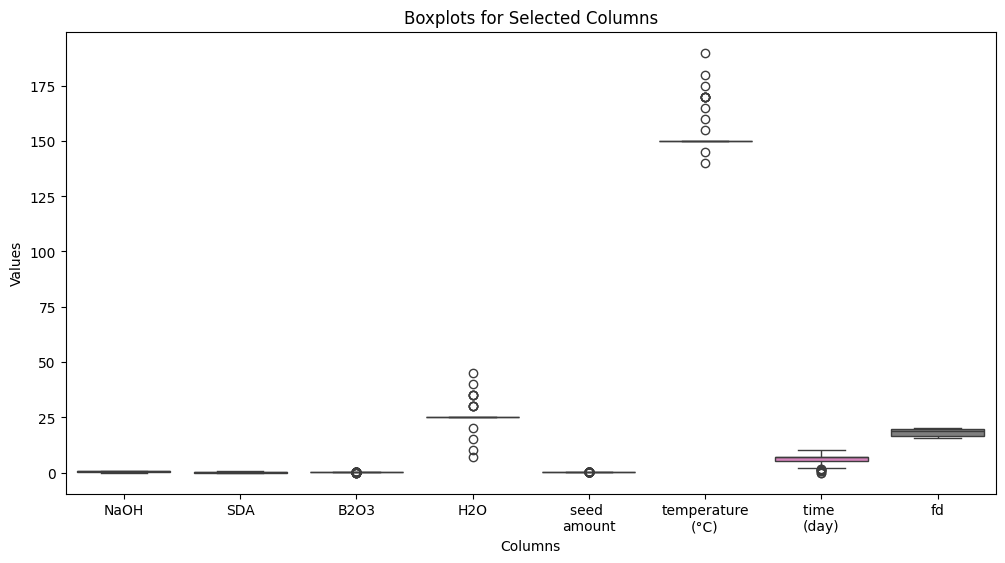

Outliers detected in the following columns:
NaOH                  0
SDA                   0
B2O3                 51
H2O                  14
seed \namount        65
temperature\n(°C)    14
time \n(day)          9
fd                    0
dtype: int64


In [107]:
#Looking for outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the interquartile range (IQR) for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (df[numeric_cols] < (Q1 - outlier_threshold)) | (df[numeric_cols] > (Q3 + outlier_threshold))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numeric_cols], ax=ax)

# Set labels and title
ax.set_title('Boxplots for Selected Columns')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

plt.show()

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

While there are outliers, dropping them breaks my correlation plot, and most are minor fluctuations in H2O and Temperature. If there are no outliers in the Columns, then they will be only one variable

Check for duplicates

In [108]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()
# If there are any duplicates, the 'duplicates' variable will contain True for those rows
if duplicates.any():
    # Get the rows with duplicates
    duplicate_rows = df[duplicates]
else:
    print("No duplicates found in the dataset.")

Showing Correlations

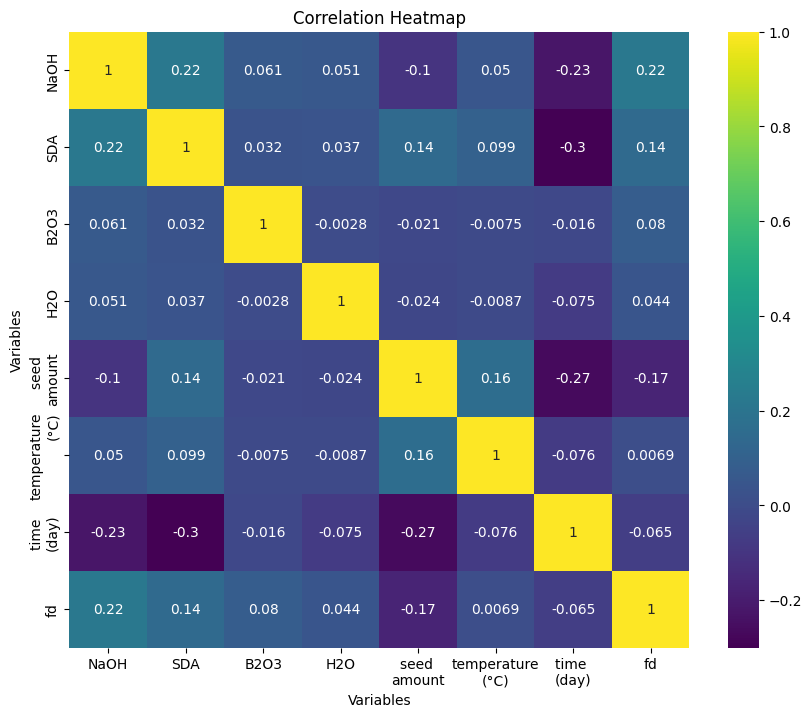

In [109]:
#Redefining numeric columns since I get an error if I don't
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

#Make the correlation matrix
correlation_matrix = numeric_cols.corr()

#Making the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

# Set the title and labels
plt.title("Correlation Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

None of the data is too highly correlated, so don't need to drop any columns

Encode the targets if needed

In [110]:
import pickle

label_encoder = LabelEncoder()

# Apply label encoding to the target column (Fire Occurrence)
df['class'] = label_encoder.fit_transform(df['class'])

# Save the label encoder for future use
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

Encode the Features

In [111]:
df_encoded = pd.get_dummies(df, columns=['seed'], drop_first=True)
print(df_encoded.head())

   NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  time \n(day)    fd  \
0  0.40  0.3   0.1   25           0.05                150           7.0  19.9   
1  0.00  0.0   0.1   25           0.05                150           7.0  19.9   
2  0.10  0.0   0.1   25           0.05                150           7.0  19.9   
3  0.20  0.0   0.1   25           0.05                150           7.0  19.9   
4  0.25  0.0   0.1   25           0.05                150           7.0  19.9   

   class  seed_ERI  seed_EUO  seed_IWV  seed_MFI  seed_MTT  seed_MWW  \
0      0     False     False     False     False     False     False   
1      0     False     False     False     False     False     False   
2      0     False     False     False     False     False     False   
3      0     False     False     False     False     False     False   
4      0     False     False     False     False     False     False   

   seed_SFE  seed_TON  
0     False     False  
1     False     False  
2     Fa

Training the models

Random Forest:
  Average RMSE: 0.245
  Average MAE: 0.122
  Average R² Test Score: 0.714
  Average R² Train Score: 0.961
 
Gradient Boosting:
  Average RMSE: 0.277
  Average MAE: 0.175
  Average R² Test Score: 0.632
  Average R² Train Score: 0.832
 
MLP:
  Average RMSE: 0.431
  Average MAE: 0.334
  Average R² Test Score: -0.306
  Average R² Train Score: -0.201
 
SVR:
  Average RMSE: 0.451
  Average MAE: 0.338
  Average R² Test Score: -0.283
  Average R² Train Score: -0.203
 
Logistic Regression:
  Average RMSE: 0.465
  Average MAE: 0.326
  Average R² Test Score: -0.284
  Average R² Train Score: -0.203
 


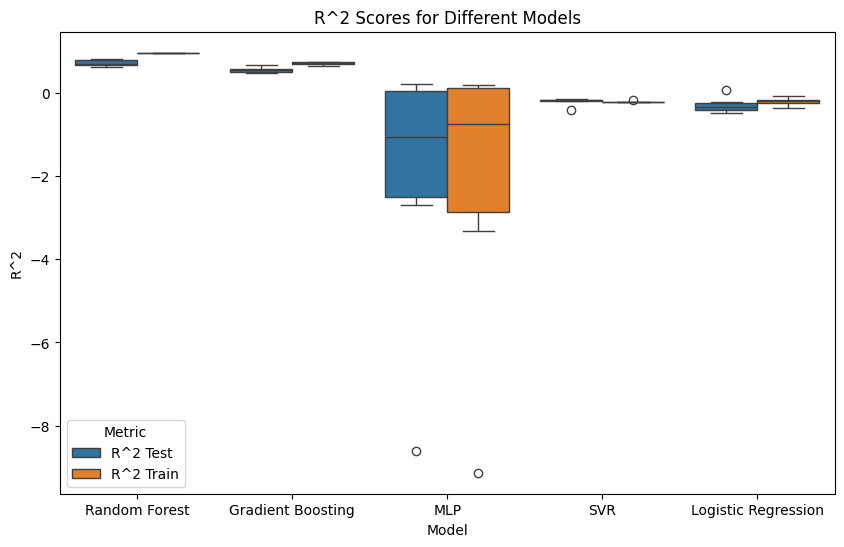

In [113]:
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression

# Split the dataset into features and target
X = df_encoded.drop('class', axis=1)
Y = df_encoded['class']

# Define the number of folds for K-Fold cross-validation
n_folds = 6

# Initialize empty lists to store evaluation metrics
rmse_scores = []
mae_scores = []
r2_test_scores = []
r2_train_scores = []

# Define the models dictionary
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'Logistic Regression': LogisticRegression(),
}

# K-Fold cross-validation loop
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for name, model in models.items():
    # Loop through each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Train the model on the training data for this fold
        model.fit(X_train, y_train)

        # Predict on the testing data for this fold
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        rmse = root_mean_squared_error(y_test, y_pred)  # Calculate RMSE directly
        mae = mean_absolute_error(y_test, y_pred)
        r2_test = r2_score(y_test, y_pred)

        # Additionally, calculate R-squared on the training data for each fold (optional)
        y_train_pred = model.predict(X_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Calculate R^2 difference
        r2_diff = r2_train - r2_test

        # Append the scores to the lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_test_scores.append(r2_test)
        r2_train_scores.append(r2_train)

    # Print average scores after all folds for each model
    print(f"{name}:")
    print(f"  Average RMSE: {np.mean(rmse_scores):.3f}")
    print(f"  Average MAE: {np.mean(mae_scores):.3f}")
    print(f"  Average R² Test Score: {np.mean(r2_test_scores):.3f}")
    print(f"  Average R² Train Score: {np.mean(r2_train_scores):.3f}")
    print(' ')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
              'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting',
              'MLP', 'MLP', 'MLP', 'MLP', 'MLP', 'MLP',
              'SVR', 'SVR', 'SVR', 'SVR', 'SVR', 'SVR',
              'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression'],
    'R^2 Test': r2_test_scores,
    'R^2 Train': r2_train_scores,
})

# Melt the DataFrame for easier plotting
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='R^2')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R^2', hue='Metric', data=melted_df)
plt.title('R^2 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.legend(title='Metric')
plt.show()

Will choose Logistic Regression as the desired machine learning model due to the Targets

Define and retrain the best model

In [117]:
# Define the number of folds for K-Fold cross-validation
n_folds = 6  # You can adjust this value based on your needs

# K-Fold cross-validation loop
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create the model
best_model = LogisticRegression()

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the model on the training data for this fold
    best_model.fit(X_train, y_train)

    # Predict on the testing data for this fold
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    rmse = root_mean_squared_error(y_test, y_pred)  # Calculate RMSE directly
    mae = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    # Additionally, calculate R-squared on the training data for each fold (optional)
    y_train_pred = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Append the scores to the lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_test_scores.append(r2_test)
    r2_train_scores.append(r2_train)

# Print average scores after all folds for each model
print(f"Logistic Regression")
print(f"  Average RMSE: {np.mean(rmse_scores):.3f}")
print(f"  Average MAE: {np.mean(mae_scores):.3f}")
print(f"  Average R² Test Score: {np.mean(r2_test_scores):.3f}")
print(f"  Average R² Train Score: {np.mean(r2_train_scores):.3f}")
print(' ')

Random Forest
  Average RMSE: 0.491
  Average MAE: 0.303
  Average R² Test Score: -0.284
  Average R² Train Score: -0.205
 


Save the model to a pickle file

In [118]:
import pickle

# Save the best model as a pickel
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Partial Dependance Plot to show interpretability

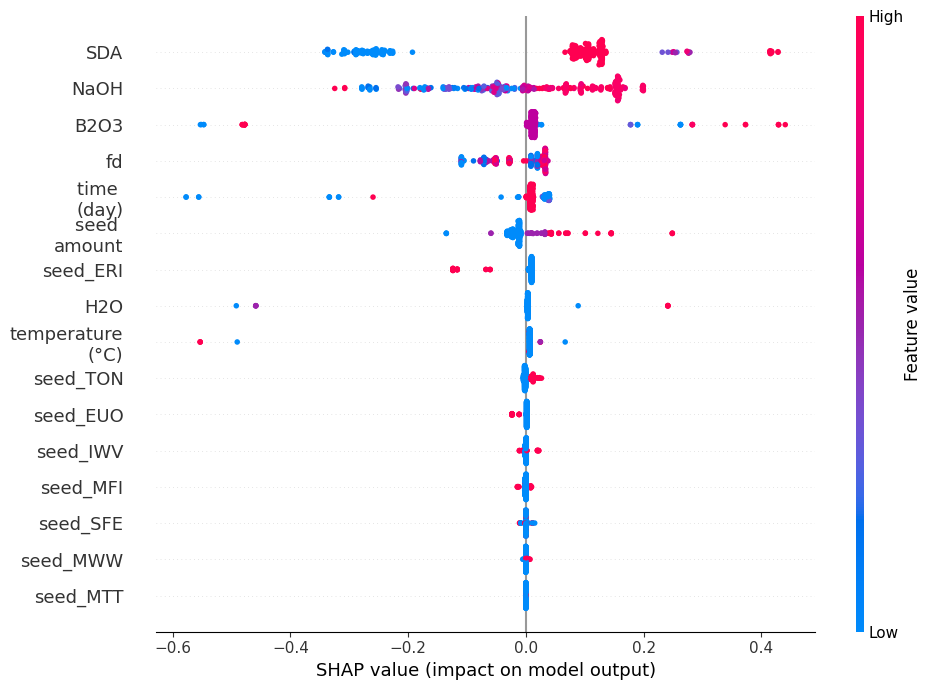

In [130]:
def plot_shap(data, target_column, model):
    x = df_encoded.drop(target_column, axis=1)
    y = df_encoded[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # SHAP summary plot
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train,
                    plot_size= (10,7))

# define model to use
plot_shap(df_encoded,'class',model)